In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# file location for the file downloaded from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310078401; may vary
file = "E:/Data_repository/Covid/canada/13100784.csv"

In [81]:
# creates the dataframe
df = pd.read_csv(file, parse_dates = ["REF_DATE"] )

In [83]:
# deaths are reported by place of occurence; having it written out is a bit verbose
df.replace({location: location[:-len(", place of occurrence")] for location in df.GEO.unique()}, inplace=True)

In [84]:
# pivoting for the sake of plotting
df_to_plot = df.pivot_table(index = "REF_DATE", columns = ["GEO","Characteristics"], values = ["VALUE"])

In [88]:
# focusing on just one location, and dropping useless levels in the column index
test_df = df_to_plot.loc[:,df_to_plot.columns.get_level_values(1)=="Canada"]
test_df.columns = test_df.columns.droplevel([0,1])

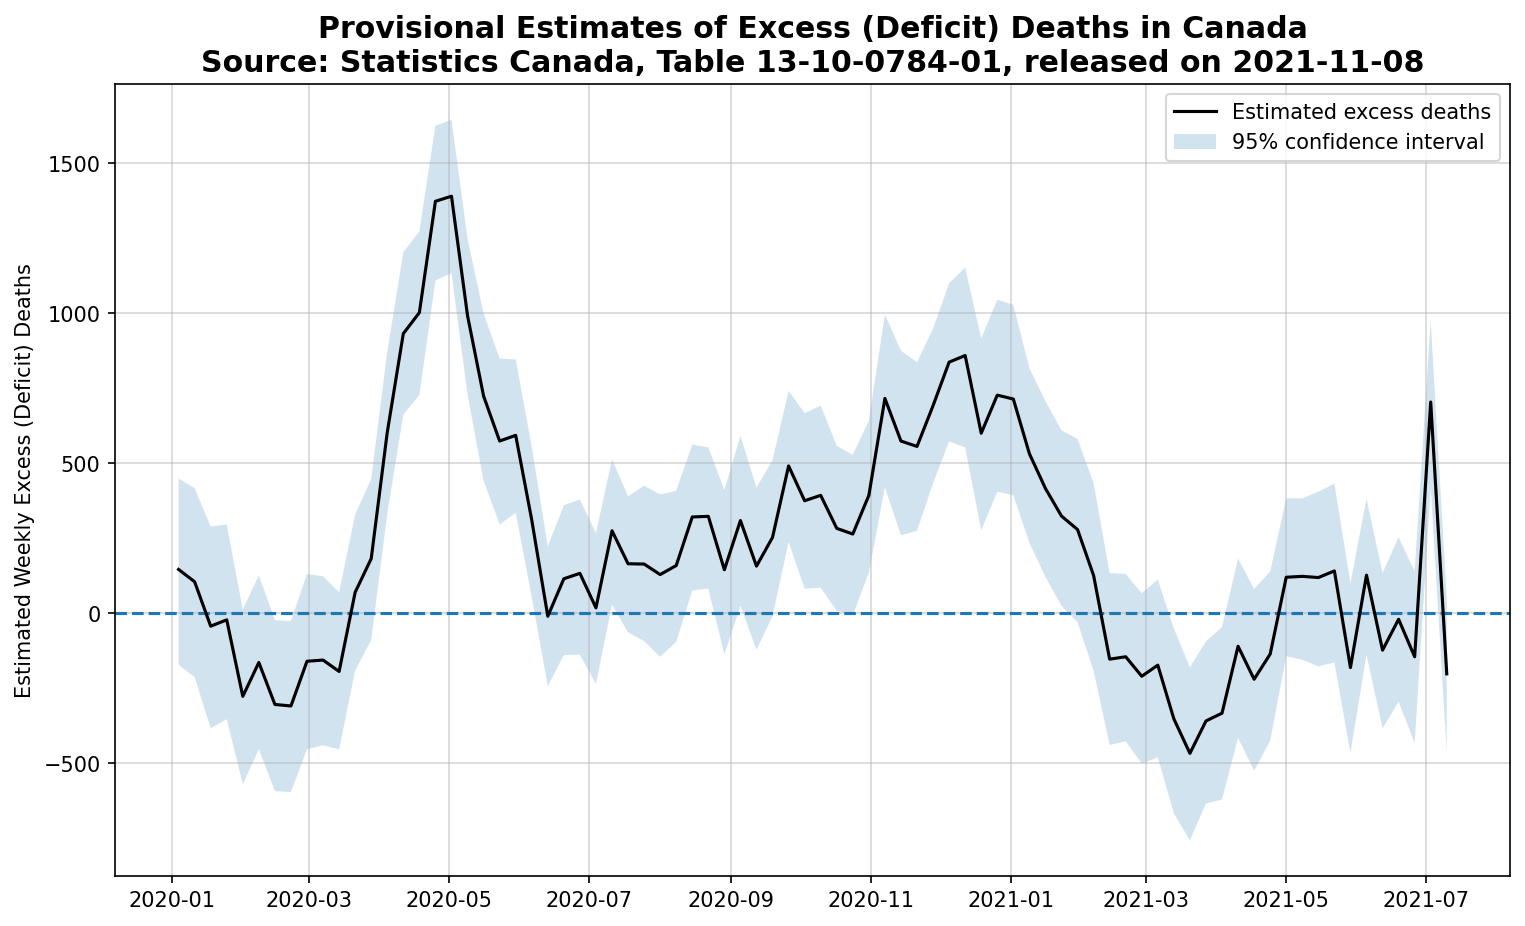

In [113]:
# adjust figure parameters as you prefer
fig, ax = plt.subplots(figsize = (12,7), dpi = 150)

# Main plot
ax.plot(test_df.index,test_df.iloc[:,[1]], c = "k", label = "Estimated excess deaths")
# Confidence interval
ax.fill_between(test_df.index, test_df.iloc[:,4].values,test_df.iloc[:,7], alpha = 0.2, label = "95% confidence interval")

# showing a 0 line
x_limits = ax.get_xlim()
ax.hlines(0,x_limits[0],x_limits[1],ls="--")

ax.set_ylabel("Estimated Weekly Excess (Deficit) Deaths")
# Resetting the x limits because of the 0 horizontal line above
ax.set_xlim(x_limits)

# cosmetics
ax.set_title("Provisional Estimates of Excess (Deficit) Deaths in Canada\nSource: Statistics Canada, Table 13-10-0784-01, released on 2021-11-08", fontsize = "x-large", fontweight = "bold")
ax.legend()
ax.grid(alpha = 0.5)

# without this the figure has a transparent background
fig.set_facecolor("white")